<a href="https://colab.research.google.com/github/alti-tude/video-slide-matching/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-image

  Using cached https://files.pythonhosted.org/packages/3b/ee/edbfa69ba7b7d9726e634bfbeefd04b5a1764e9e74867ec916113eeaf4a1/skimage-0.0.tar.gz
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-ny2fe2z2/skimage/


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import cv2
from matplotlib import pylab as plt
from math import floor, ceil

root = '/content/gdrive/My Drive/data/Data/new_test/'
frame_root = root + 'frames/'
ppt_root = root + 'ppts/'

import cv2 as cv
from matplotlib import pyplot as plt
def plotit(args):
  c = 1
  for i in args:
    image = cv.imread(i)
    plt.subplot(1, 3, c), plt.imshow(image, 'gray')
    c = c+1
  plt.show()

In [0]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
        <p> {value}/{max}</p>
    """.format(value=value, max=max))


In [0]:
def incContrast(img_path):
    bgr = cv2.imread(img_path)
    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    cbgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    bgr = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    cbgr = cv2.cvtColor(cbgr, cv2.COLOR_BGR2GRAY)

    return cbgr

In [0]:
from skimage.measure import compare_ssim as ssim
cache = {}

def compare(frame, ppt):
    global cache
    
    if frame in cache:
        frame = cache[frame].copy()
    else:
        cache[frame] = incContrast(frame)
        frame = cache[frame].copy()
        
    if ppt in cache:
        ppt = cache[ppt].copy()
    else:
        cache[ppt] = cv2.imread(ppt,0)
        ppt = cache[ppt].copy()

    
#     plt.subplot(121), plt.imshow(frame, cmap='gray')
#     plt.subplot(122), plt.imshow(ppt, cmap='gray')
#     plt.show()

    n = min(ppt.shape[0], frame.shape[0])
    m = min(ppt.shape[1], frame.shape[1])
    
    frame = frame[int((frame.shape[0]-n)/2):frame.shape[0] - ceil((frame.shape[0]-n)/2), int((frame.shape[1]-m)/2):frame.shape[1] - ceil((frame.shape[1]-m)/2)]
    ppt = ppt[int((ppt.shape[0]-n)/2):ppt.shape[0] - ceil((ppt.shape[0]-n)/2), int((ppt.shape[1]-m)/2):ppt.shape[1] - ceil((ppt.shape[1]-m)/2)]
    
    frame = frame.astype(float)
    ppt = ppt.astype(float)
    
#     plt.subplot(121), plt.imshow(frame, cmap='gray')
#     plt.subplot(122), plt.imshow(ppt, cmap='gray')
#     plt.show()
    
    mean_f = np.mean(frame)
    mean_p = np.mean(ppt)
    sd_f = np.std(frame)
    sd_p = np.std(ppt)
    
    ###### for implementing ssim #############
#     sd_pf = np.sqrt(np.sum(frame*ppt)/(n*m-1))
#     print((4*mean_f*mean_p*sd_pf)/((mean_f**2+mean_p**2)*(sd_f**2+sd_p**2)))
#     return (4*mean_f*mean_p*sd_pf)/((mean_f**2+mean_p**2)*(sd_f**2+sd_p**2))

    ############# normxcorr ###################
    return np.sum((frame-mean_f)*(ppt-mean_p))/(sd_f*sd_p)

In [0]:
ppts = os.listdir(ppt_root)
frames = os.listdir(frame_root)
op = open(root+'op3.txt', 'w')

out = display(progress(0, len(frames)), display_id=True)
cache = {}
co = 0

for frame in frames:
    ma = 0
    best_match = -1
    for ppt in ppts:
        corr = compare(frame_root+frame, ppt_root+ppt)
        
        if corr>ma:
            ma = corr
            best_match = ppt
            
    op.write("%s %s\n"%(frame, best_match))
    out.update(progress(co+1, len(frames)))
    co+=1
    
op.close()

In [0]:
!diff /content/gdrive/My\ Drive/data/Data/new_test/op2.txt /content/gdrive/My\ Drive/data/Data/new_test/op3.txt

/content/gdrive/My Drive/data/Data/new_test/../tmp/frame.jpg /content/gdrive/My Drive/data/Data/new_test/../tmp/correct_match.jpg


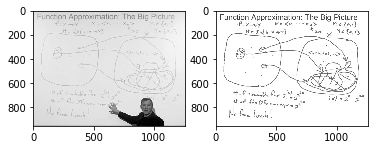

47611.3097841909

In [0]:
compare(root+'../tmp/frame.jpg', root+'../tmp/correct_match.jpg')

/content/gdrive/My Drive/data/Data/new_test/../tmp/frame.jpg /content/gdrive/My Drive/data/Data/new_test/../tmp/incorrect_match.jpg


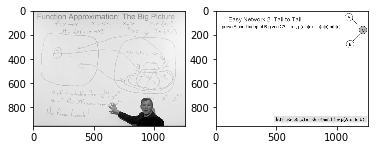

209066.91807568583

In [0]:
compare(root+'../tmp/frame.jpg', root+'../tmp/incorrect_match.jpg')

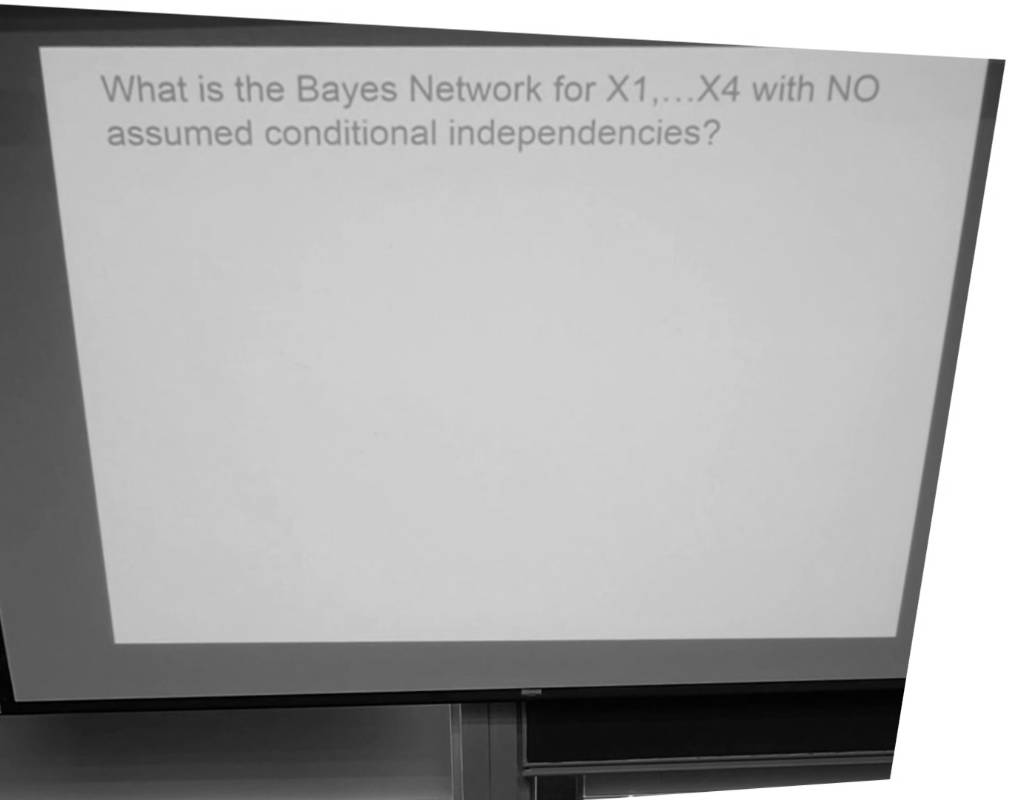

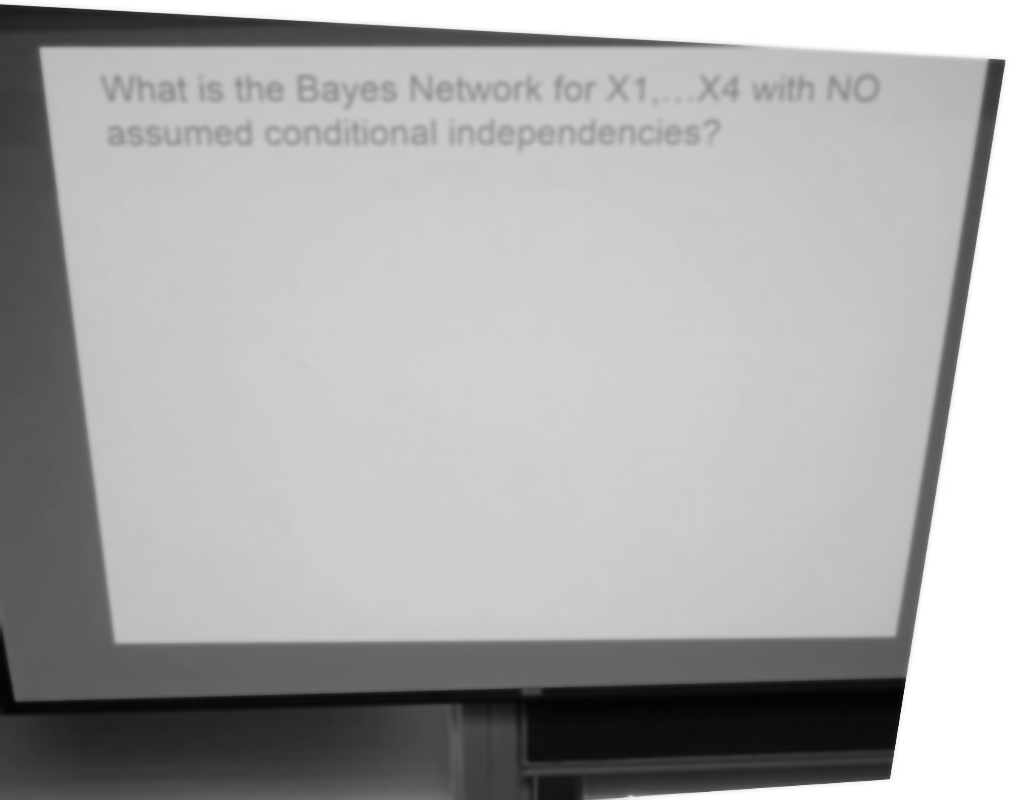

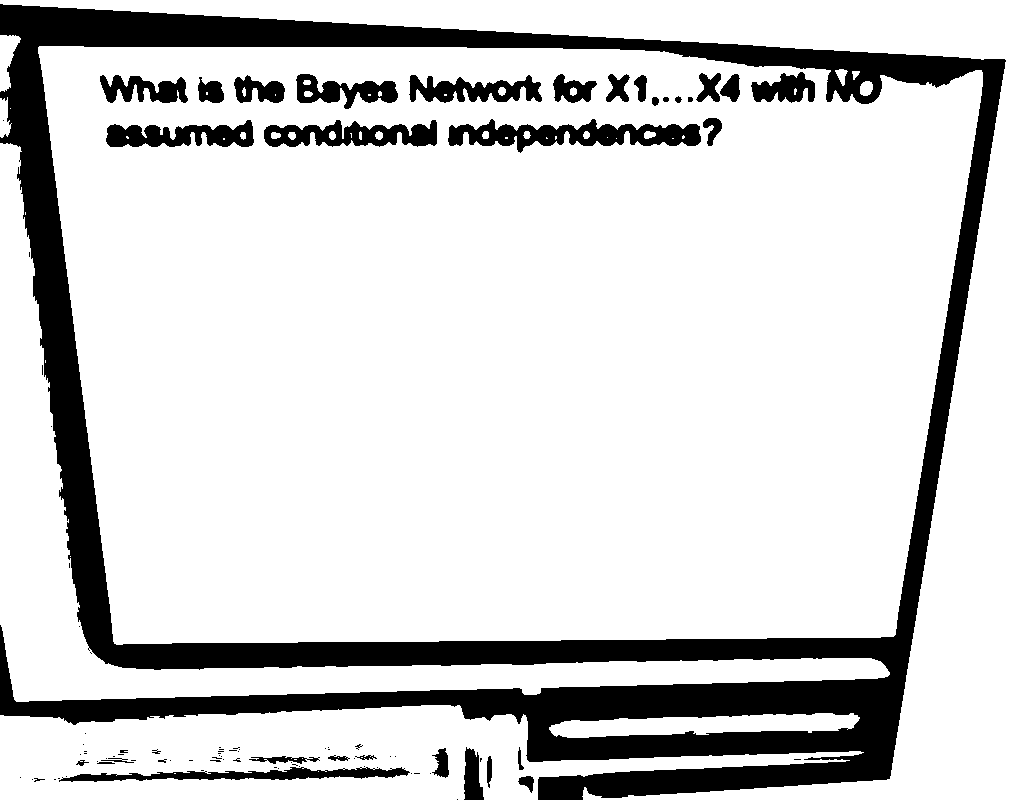

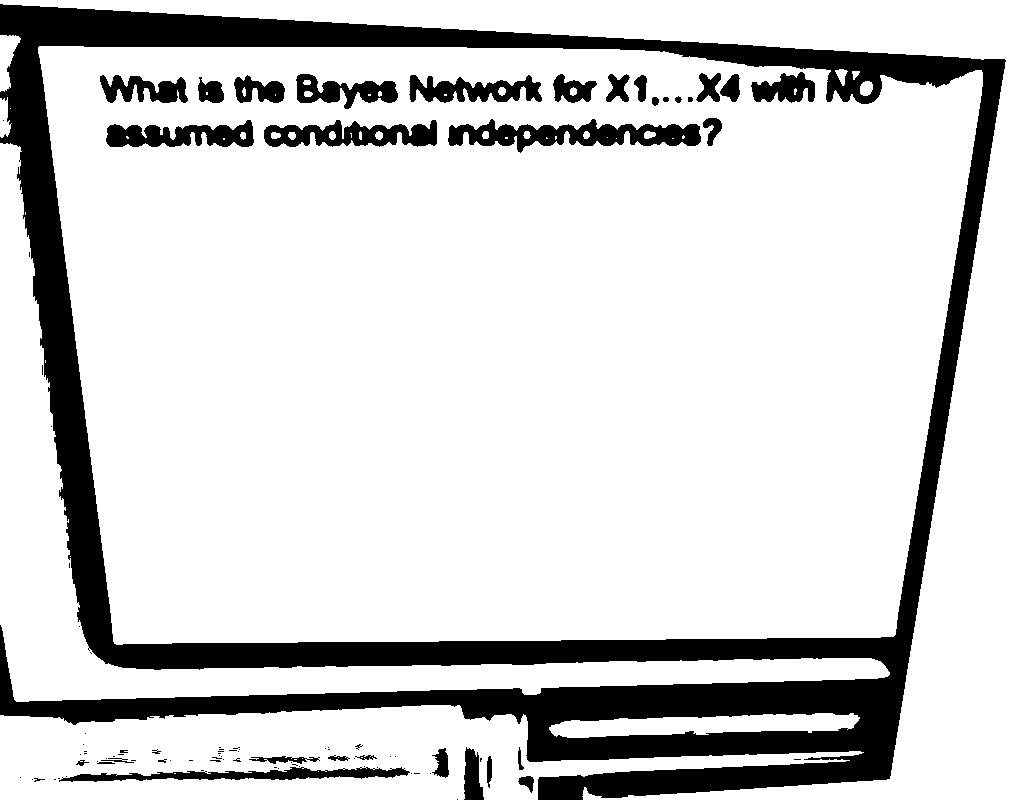

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_path = root+'../tmp/perspective/frame.jpg'
# Load image and convert it from BGR to RGB
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

def resize(img, height=800):
    """ Resize image to given height """
    rat = height / img.shape[0]
    return cv2.resize(img, (int(rat * img.shape[1]), height))

# Resize and convert to grayscale
img = cv2.cvtColor(resize(image), cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

# # Bilateral filter preserv edges
img = cv2.bilateralFilter(img, 9, 75, 75)
cv2_imshow(img)

# Create black and white image based on adaptive threshold
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 4)
cv2_imshow(img)

# Median filter clears small details
img = cv2.medianBlur(img, 11)
cv2_imshow(img)

# Add black border in case that page is touching an image border
img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])

edges = cv2.Canny(img, 200, 250)

In [123]:
# Getting contours  
im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Finding contour of biggest rectangle
# Otherwise return corners of original image
# Don't forget on our 5px border!
height = edges.shape[0]
width = edges.shape[1]
MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

# Page fill at least half of image, then saving max area found
maxAreaFound = MAX_COUNTOUR_AREA * 0.5

# Saving page contour
pageContour = np.array([[5, 5], [5, height-5], [width-5, height-5], [width-5, 5]])

# Go through all contours
for cnt in contours:
    # Simplify contour
    perimeter = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.0003 * perimeter, True)

    # Page has 4 corners and it is convex
    # Page area must be bigger than maxAreaFound 
    print(len(approx), cv2.isContourConvex(approx),  maxAreaFound < cv2.contourArea(approx) < MAX_COUNTOUR_AREA)
    if (len(approx) == 4 and
            cv2.isContourConvex(approx) and
            maxAreaFound < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):

        maxAreaFound = cv2.contourArea(approx)
        pageContour = approx
        
        # Sort and offset corners
        pc = fourCornersSort(pageContour[:, 0])
        pc = contourOffset(pc, (-5, -5))

        # Recalculate to original scale - start Points
        sPoints = pc.dot(image.shape[0] / 800)

        # Using Euclidean distance
        # Calculate maximum height (maximal length of vertical edges) and width
        height = max(np.linalg.norm(sPoints[0] - sPoints[1]),
                     np.linalg.norm(sPoints[2] - sPoints[3]))
        width = max(np.linalg.norm(sPoints[1] - sPoints[2]),
                     np.linalg.norm(sPoints[3] - sPoints[0]))

        # Create target points
        tPoints = np.array([[0, 0],
                            [0, height],
                            [width, height],
                            [width, 0]], np.float32)
        ti = image.copy()
        pts = sPoints.reshape((-1,1,2))
        cv2.polylines(ti,np.int32([pts]),False,(255,255,255))
        cv2_imshow(ti)


2 False False
6 False False
4 True False
4 True False
317 False False
197 False False
32 False False
22 False False
141 False False
133 False False
150 False False
150 False False
151 False False
6 False False
23 False False
18 False False
31 False False
2 False False
1 False False
5 False False
1 False False
2 False False
6 False False
4 True False
4 True False
44 False False
49 False False
5 True False
6 True False
5 True False
6 True False
25 False False
6 True False
15 False False
9 False False
27 False False
23 False False
56 False False
50 False False
31 False False
29 False False
64 False False
49 False False
8 True False
67 False False
79 False False
6 True False
8 False False
124 False False
286 False False
108 False False
232 False False
76 False False
19 False False
23 False False
25 False False
20 False False
7 False False
8 False False
10 False False
2 False False
51 False False
30 False False
57 False False
37 False False
64 False False
28 False False
29 False False
4 Tru

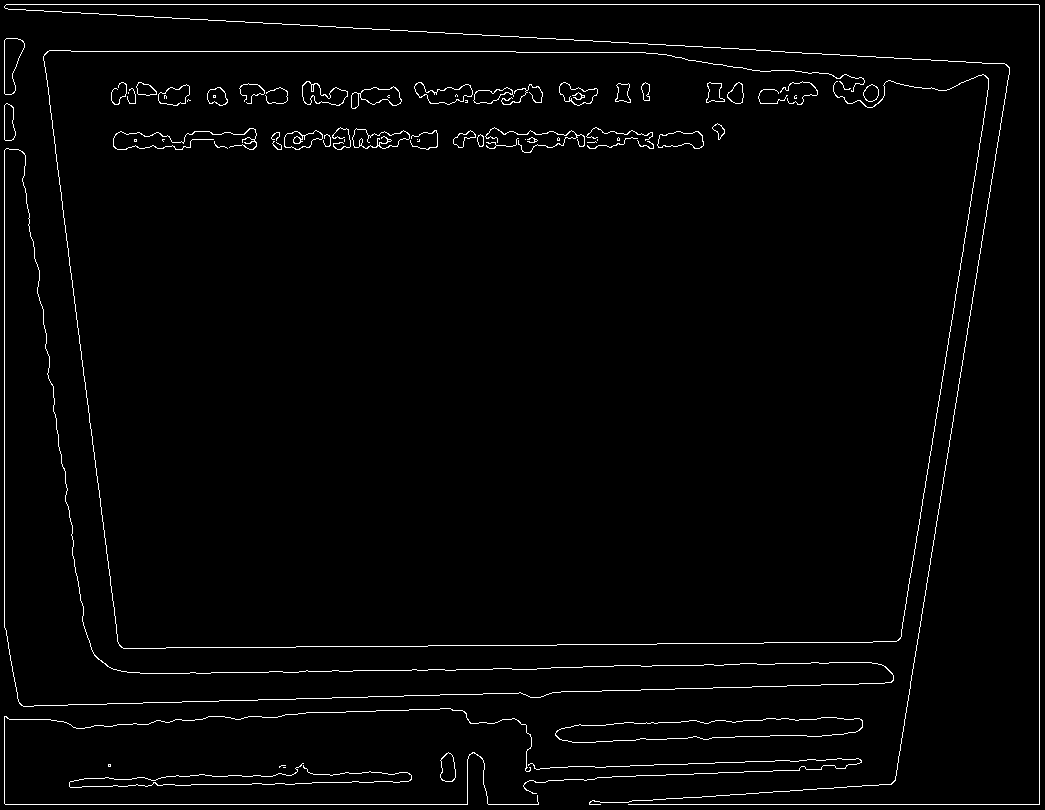

In [124]:
# a = contours
# while(1):
#     print(len(a))
#     a = a[0]
# print(contours[0])
cv2_imshow(im2)

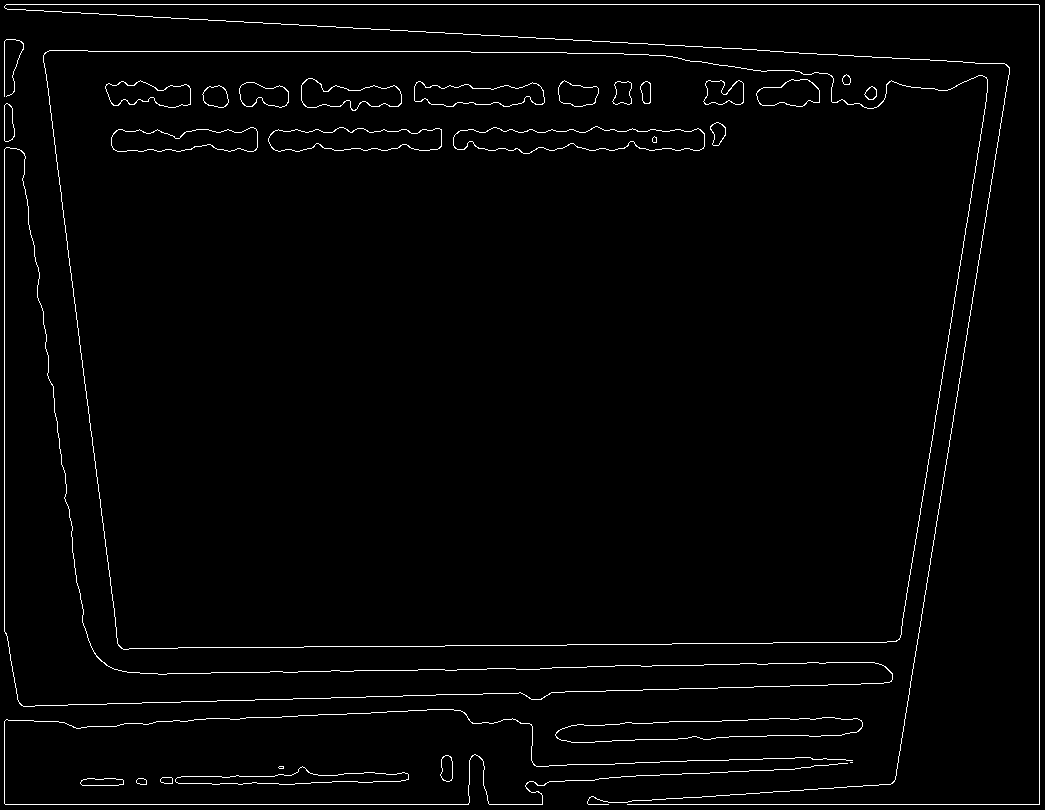

In [117]:
cv2_imshow(im2)

In [0]:
def fourCornersSort(pts):
    """ Sort corners: top-left, bot-left, bot-right, top-right """
    # Difference and sum of x and y value
    # Inspired by http://www.pyimagesearch.com
    diff = np.diff(pts, axis=1)
    summ = pts.sum(axis=1)
    
    # Top-left point has smallest sum...
    # np.argmin() returns INDEX of min
    return np.array([pts[np.argmin(summ)],
                     pts[np.argmax(diff)],
                     pts[np.argmax(summ)],
                     pts[np.argmin(diff)]])


def contourOffset(cnt, offset):
    """ Offset contour, by 5px border """
    # Matrix addition
    cnt += offset
    
    # if value < 0 => replace it by 0
    cnt[cnt < 0] = 0
    return cnt


# Sort and offset corners
pageContour = fourCornersSort(pageContour[:, 0])
pageContour = contourOffset(pageContour, (-5, -5))

# Recalculate to original scale - start Points
sPoints = pageContour.dot(image.shape[0] / 800)
  
# Using Euclidean distance
# Calculate maximum height (maximal length of vertical edges) and width
height = max(np.linalg.norm(sPoints[0] - sPoints[1]),
             np.linalg.norm(sPoints[2] - sPoints[3]))
width = max(np.linalg.norm(sPoints[1] - sPoints[2]),
             np.linalg.norm(sPoints[3] - sPoints[0]))

# Create target points
tPoints = np.array([[0, 0],
                    [0, height],
                    [width, height],
                    [width, 0]], np.float32)

# getPerspectiveTransform() needs float32
if sPoints.dtype != np.float32:
    sPoints = sPoints.astype(np.float32)

# Wraping perspective
M = cv2.getPerspectiveTransform(sPoints, tPoints) 
newImage = cv2.warpPerspective(image, M, (int(width), int(height)))

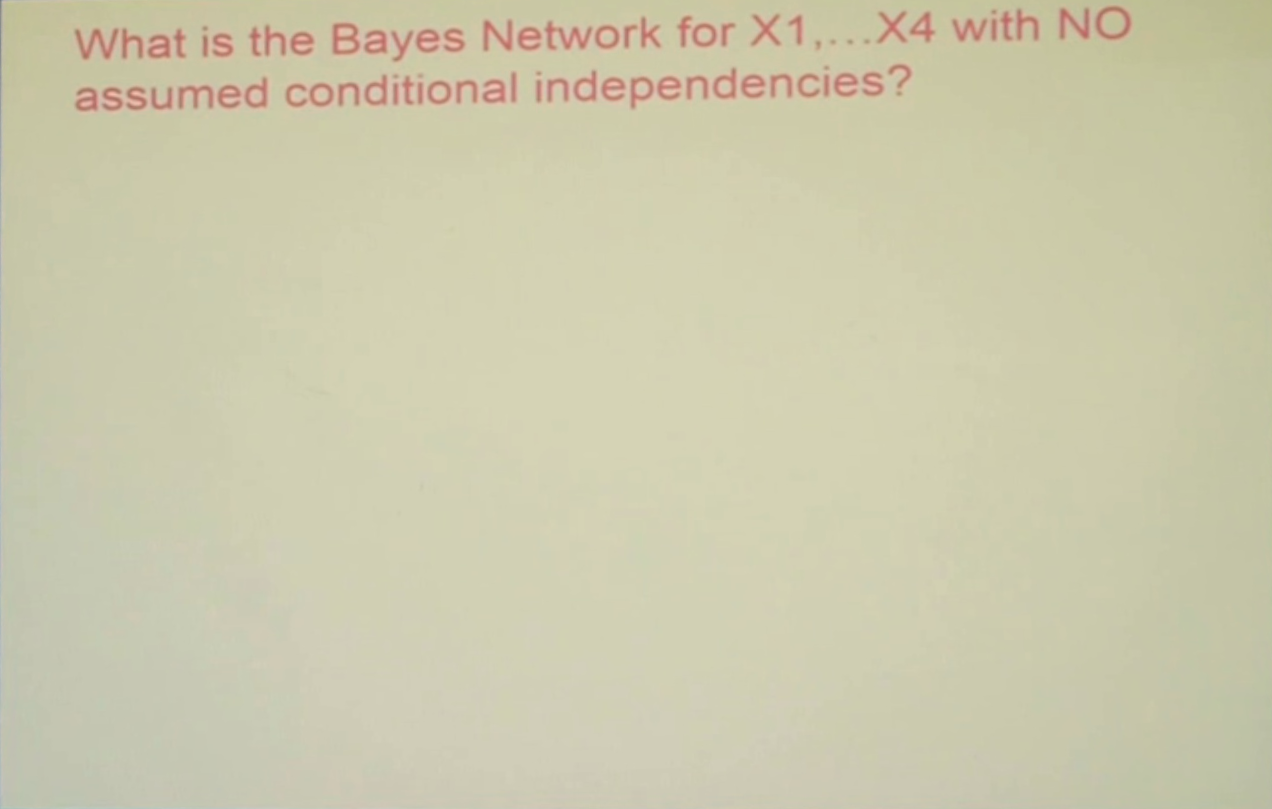

In [78]:
cv2_imshow(newImage)


In [69]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
print(pts)
pts = pts.reshape((-1,1,2))
print(pts.shape)

[[10  5]
 [20 30]
 [70 20]
 [50 10]]
(4, 1, 2)


In [32]:
a = [1,2]
tuple(a)

(1, 2)